**Problem Statement for the Advertising data**  

The dataset file consists of advertising expenditure incurred on different mediums and the overall increase in revenue that was seen during that time. For any business, advertising their products is very essential because it aids in the fast selling of a product, increases the popularity and awareness of the product in the market, which in turn, increases the overall sales for the product. But more than that, what matters for the business is that correct amount of investment should be done upon the advertisements such that it generates good return on investments otherwise it will just lead to an added expenditure.  

The dataset contains statistics about the increase in sales of a product in 200 different months, together with advertising budgets in each of these months for different media channels: TV, radio and newspaper. The budget and the increase in sales is in thousands of dollars.  

You are expected to implement regression technique and predict what would be the increase in sales given the advertisement expenditure for that month. You are free to use any ML algorithms, evaluate, fine tune and reach a best model. Also derive additional/meaningful insights from the data which can help the organization to decide upon the right channels and amount of investments to be done on each media channel. 


# Importing the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random as rn
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [5]:
data = pd.read_csv(r"C:\Users\bsai1\OneDrive\Desktop\imarticus\Machine Learning\Linear Regression\Advertising Lin Reg Problem\Advertising.csv",index_col=0, header=0)

In [6]:
data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


# Basic EDA

In [8]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [9]:
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [10]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [12]:
data.shape

(200, 4)

**No feature selection is needed as all three independent variables are relevant to the problem statement.**

# Preprocessing the data

## Handling missing values

In [16]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

**There are no missing values in the data to be handled.**

## 3. Assumption 1: There should be no outliers in the data. 

#### Boxplot()

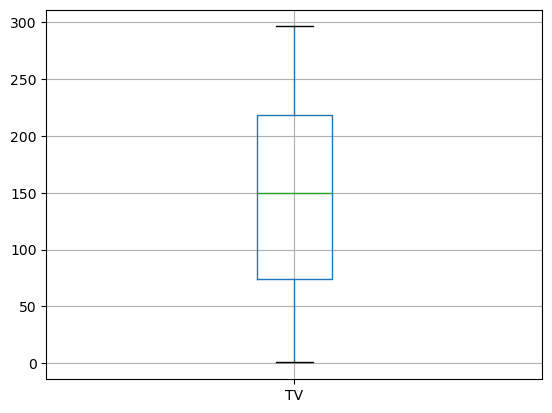

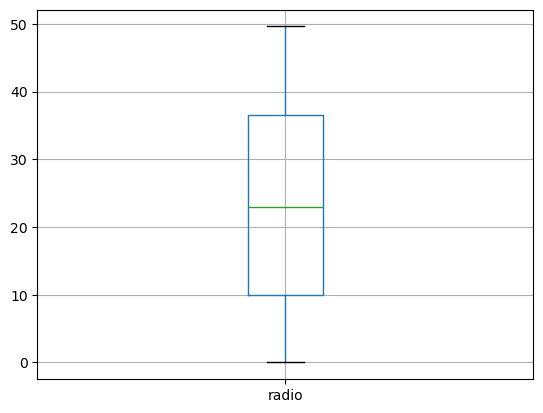

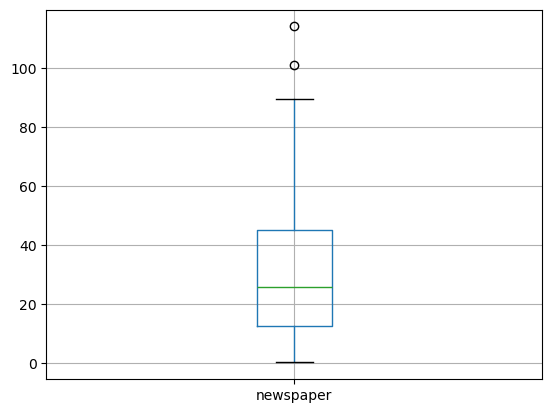

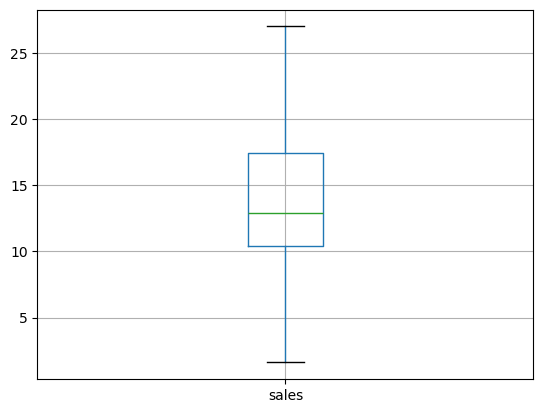

In [20]:
# Check using the boxplot.

for i in data.columns:
    data.boxplot(column = i)
    plt.show()

**Observing the boxplots, it can be concluded that in the newspaper variable there are heavy investments being made. We can drop the outlier values in the dataset to help with the further analysis of the data.**

#### Drop()

In [23]:
# data.drop(data[data['newspaper']>=90].index, axis = 0, inplace = True]) 

# we can drop the outliers valeus based on the condition

In [24]:
#in the above code, .index is used to give the index/row numbers which need to be accessed.

## 4. Assumption 2: Assumption of Linearity  

Every independent variable should have a linear relationship with the dependent variable.

#### Pairplot()

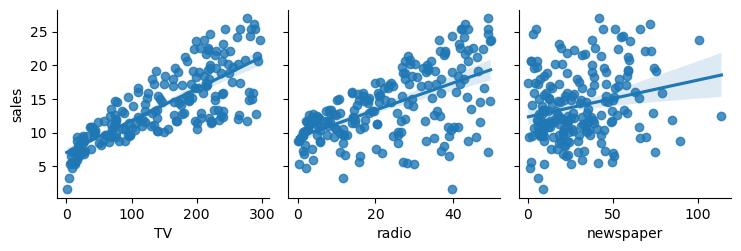

In [27]:
#check pairplot

sns.pairplot(data, x_vars=['TV','radio','newspaper'],y_vars=['sales'],kind='reg')
plt.show();

Observing the pairplots, we can see that there is strong, positive linear relationship between TV and sales.  
Also, there is moderately strong, positive linear relationship between radio and sales.  
In the newspaper variable, we can observe that due to outliers, there is weak or no relationship between newspaper and sales.  

Hence, we can eliminate the newspaper variable since it does not show a linear relationship with sales.

**TV and radio show strong and moderate linear relationship respectively with respect to sales whereas newspaper shows weak or no relation with respect to sales.**  
Therefore the newspaper column can be dropped. 

#### Drop()

In [31]:
#data.drop(['newspaper'], axis = 0, inplace = True)

In [32]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

## 5. Create X and Y 

In [34]:
# Create X and Y variables

X = data.loc[:,['TV', 'radio', 'newspaper']]
Y = data.loc[:,'sales']

# X = data.iloc[:,0:-1]
# Y = data.iloc[:,-1]

# X = data.drop(['sales'], axis = 1)
# Y =  data['sales']

In [35]:
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


## 6. Assumption 3: Assumption of Normality 

The dependent variable should follow an approximate normal distribution

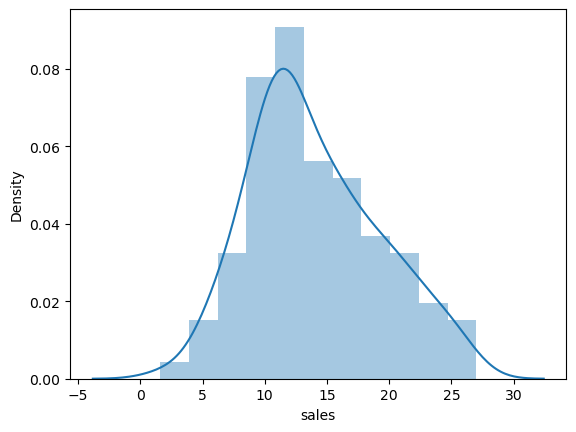

In [37]:
# check with distplot

sns.distplot(Y)
plt.show()

#sns.distplot(Y,kde=True)

We can observe that the data is approximately normally distributed.

In [39]:
"""
If the data is skewed then we can perform log transformations 
to bring the data closer to a normally distrbuted plot. 

Do not unnecesarily perform log transformations on approximately normally dsitributed data 
or else it will skew the data which will mess up the further analysis.


# log transformation

import numpy as np
Y_log = np.log(Y)

This will give us output in log values. So later on when all the processing is done,
we will have to use antilog to get back the original values. 
"""

'\nIf the data is skewed then we can perform log transformations \nto bring the data closer to a normally distrbuted plot. \n\nDo not unnecesarily perform log transformations on approximately normally dsitributed data \nor else it will skew the data which will mess up the further analysis.\n\n\n# log transformation\n\nimport numpy as np\nY_log = np.log(Y)\n\nThis will give us output in log values. So later on when all the processing is done,\nwe will have to use antilog to get back the original values. \n'

In [40]:
#sns.distplot(Y_log)
#plt.show();

## 7. Checking and handling the skewness in X variables

#### hist()

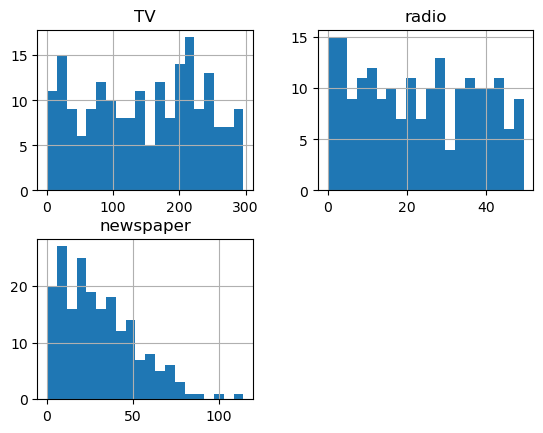

In [43]:
X.hist(bins=20)
plt.show();

**There is no typical skewness observed in TV and radio but the data is highly skewed variable.** 

#### skew(), log1p()

In [46]:
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = X.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]
 
print(data_num_skew)
print(data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])
#X["newspaper"] = np.log1p(X["newspaper"])

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


In [47]:
# explanation and important points of above block of code
# X.apply will apply 

# lambda i: skew(i.dropna()) -> it will traverse through all columns and will delete the missing values first and then run the skewed function
# on the remaining non missing value. 

# data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)] -> finds the variables which are highly skewed

# log1p is used for log transformations because there is a possibility of data containing 0 values and log0 will throw us 
# a negative infinite output which will become a problem and hence to avoid this problem log1p is used. 

# X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])-> will pick up the data variables with high skewness run log1p function 
# and store it in X variable

# log1p when there is 0 in data
# log when there is no 0 in data

# log+1 should be used when there is 0 value in the feature/variable. 
# if log0 is used it will throw an negative infinite output which will make the further analysis difficult.


In [48]:
# Y - X

# level - level  model
# log -log       model
# level - log    model
# log  - level   model 

# used by statisticians

## 8. Assumption 4: Assumption of no multicolinearity  

There should be no multicolinearity between theindependent variables.  

Multicolinearity is the relationship amongst the multiple independent variables

In [50]:
# correlation -> shows relationship between variables 
# multicolinearity -> 
# we cannot detect mutlicolinearity with only correlation because it can show relationship between 2 variables at a time.
# there should be no multicolinearity in the data

#### corr() , hist()

                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


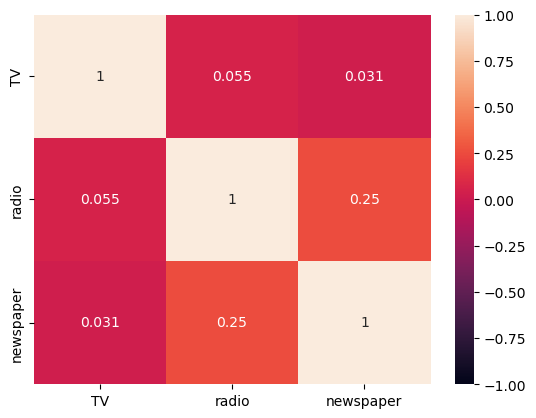

In [52]:
corr_df = X.corr(method='pearson')
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show();

We can observe through this heatmap that all the variables are independent of each other. 

In [54]:
# there should be high correlation between X and Y variables to indicate X variable is good for prediction. 
# there should be ideally no correlation between X variables such that they are independent of each other. 

In [55]:
# close to 0 -- no corr
# -0.5 to 0 AND 0 to 0.5 -- low corr
# -0.75 to -0.5 AND 0.5 to 0.75 -- moderate corr
# -1 to -0.75 AND 0.75 to 1 -- high corr
# if any 2 or more independent variables shows high corr then you can drop any 1 of the variables for analysis
# if the variables are important based on the domain knowledge then do not delete it. 

#### Variance Inflation Factor- vif()

In [57]:
# Variance Inflation Factor (VIF)
# VIF = 1 / (1 - R^2)
# acceptable VIF is less than 5 
# if VIF > 5 then it is considered that the variables show multicollinearity then we try to eliminated such variables. 
# if multiple variables show VIF > 5, then the range is extended to 10.

# in case of variables where VIF > 5, we can eliminate the one with highest VIF and 
# then recheck and repeat the process until all the variables are within the range. 

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
# X.shape -> (rows=200,columns=3)-> (0,1), X.shape[1]-> columns=3
# in vif(X.values, i) i becomes the dependent variable and the remaining variables as independent variable
vif_df.round(2)

,features,VIF Factor
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


In [59]:
# explanation of above block of code
# X.shape[1] -> X.shape(columns) X.shape gives output as (rows, columns) -> (0,1)
# vif(X.values, i) -> in first iteration i will be considered as DV i.e. TV, X.values will consider rest as IV i.e. radio and newspaper

# newspaper shows high VIF

#### drop()

In [61]:
# X.drop["newspaper",axis=1,inplace=True]

In [62]:
# Rerun the VIF code block if multiple variables show high VIF until all the variables fall into the acceptable range.

## 9. Splitting the data

In [64]:
from sklearn.model_selection import train_test_split

# split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [65]:
# train_test_split(X,Y,test_size=0.2,random_state=10)
# in train_test_split function the madnatory arguments to be passed are IV (X) and DV (Y).
# if Y is log transformed then pass Y_log as DV instead of Y. 

# test_size -> indicates how much portion of data should be reserved for the validation testing part.
# we take the test_size as either 70-30 or 80-20 (train-test)
#by default test_size is taken as 75-25
# >1000 --> test_size = 0.3
# <1000 --> test_size = 0.2

# data will be randomly splitted, best fit line will be different if random_state is not passed.
# random_state = 10 -> same value, split same, model same, same data split, random_state using a seed value
# random_state is seed value which will give reproducable output

# X_train, X_test, Y_train, Y_test -> do not interchange, first it will split X into train and then test 
# and then next it will split Y into train and then test

In [66]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
# print ("Percent of train data", X_train.shape[0]/X.shape[0]*100)

(160, 3)
(40, 3)
(160,)
(40,)


## 10. Building a model

a. Creating the model  
b. Training the model

### Creating the model and Training the model

In [69]:
from sklearn.linear_model import LinearRegression
# Create a model object
lm = LinearRegression()
# Train the emodel object
lm.fit(X_train,Y_train)

# Print intercept and cofficients
print(lm.intercept_)
print(lm.coef_)

3.3532913858151474
[ 0.0437425   0.19303708 -0.04895137]


In [70]:
# in ML, hyperparameters (test_size, random_state) are those values whihc indicate the model that how it should work
# parameters (.intercept_, .coef_) those values which are auto generated values when the model is created. 

In [71]:
# .intercept_ -> beta0
# .coef_ -> beta1, beta2, beta3

In [72]:
# Pair the feature names with the coefficients
print(list(zip(X.columns, lm.coef_)))

[('TV', 0.04374250157742166), ('radio', 0.1930370789734531), ('newspaper', -0.04895136822248787)]


In [73]:
# y = B0 + B1.TV + B2.Radio + B3.Newspaper

In [74]:
X1 = 100
X2 = 100
X3 = 100
Y_pred = 3.3532913858151474 + (0.0437425*X1) + (0.19303708*X2) + (-0.04895137*X3)
print(Y_pred)

22.136112385815146


In [75]:
X1 = 100
X2 = 100
X3 = np.log1p(100)
Y_pred = 3.3532913858151474 + (0.0437425*X1) + (0.19303708*X2) + (-0.04895137*X3)
print(Y_pred)

26.805332913800658


In [76]:
X1 = 100
X2 = 100
X3 = np.log1p(0)
Y_pred = 3.3532913858151474 + (0.0437425*X1) + (0.19303708*X2) + (-0.04895137*X3)
print(Y_pred)

27.031249385815148


In [77]:
X1 = 100
X2 = 200
X3 = np.log1p(0)
Y_pred = 3.3532913858151474 + (0.0437425*X1) + (0.19303708*X2) + (-0.04895137*X3)
print(Y_pred)

46.334957385815144


In [78]:
# Predict using the model

Y_pred = lm.predict(X_test)
print(Y_pred)

[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


In [79]:
new_df = pd.DataFrame()
new_df = X_test.copy()

new_df['Actual sales'] = Y_test
new_df['Predicted sales'] = Y_pred
new_df=new_df.reset_index().drop("index", axis=1)

In [80]:
new_df

,TV,radio,newspaper,Actual sales,Predicted sales
0,210.7,29.5,2.332144,18.4,18.150269
1,8.7,48.9,4.330733,7.2,12.961369
2,218.4,27.7,3.996364,18.0,18.058153
3,283.6,42.0,4.207673,25.5,23.660251
4,216.4,41.7,3.703768,22.6,20.687510
5,147.3,23.9,3.000720,14.6,14.263259
6,188.4,18.1,3.280911,14.9,14.927745
7,198.9,49.4,4.110874,23.7,21.388474
8,216.8,43.9,3.339322,22.3,21.147529
9,17.2,45.9,4.252772,9.3,12.757885


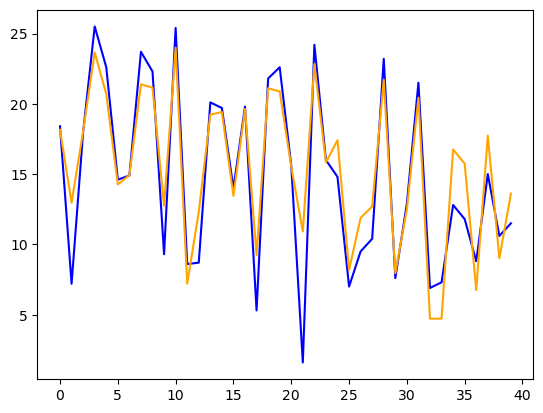

In [81]:
new_df["Actual sales"].plot(color="blue")
new_df["Predicted sales"].plot(color="orange")
plt.show()

## 11. Evaluation of the model 

### R^2, Adjusted R^2, RMSE

In [84]:
lm.score(X_train, Y_train)

# Y_pred = lm.predict(X_train)
# score = r2_score(Y_train, Y_pred)

0.9208986647500219

In [85]:
#^^ Since the above code line is executed on the training data, do not quote this to the client. 
#^^ We send the testing data score to the client which we will be executing in the next block.
# ^^ lm.score is not a reliable output hence we check for r^2 and adjusted r^2.

In [86]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.834801071903532
RMSE: 2.59297691109306
Adj R-square: 0.8322725168816474


In [87]:
print(Y_test.min())
print(Y_test.max())

1.6
25.5


In [88]:
# RMSE is low in comparision to the range

**Both the R^2 and adj R^2 are close to 1 and close to each other hence the model is a good model.**

**RMSE value is within the range and on the lower side hence the model is a good model**

In [91]:
new_df['Residual']= new_df['Actual sales'] - new_df['Predicted sales']
new_df.to_excel("Sales Prediction.xlsx", header = True, index = True)
new_df.head()

,TV,radio,newspaper,Actual sales,Predicted sales,Residual
0,210.7,29.5,2.332144,18.4,18.150269,0.249731
1,8.7,48.9,4.330733,7.2,12.961369,-5.761369
2,218.4,27.7,3.996364,18.0,18.058153,-0.058153
3,283.6,42.0,4.207673,25.5,23.660251,1.839749
4,216.4,41.7,3.703768,22.6,20.687510,1.912490


In [92]:
# ^^ we are only comparing since we have split the original data. 
# in the real world, we wont get test data output and we will have to assume the values we predicted to be the best ones and quote it to the client.

In [150]:
import os
os.getcwd()

'C:\\Users\\bsai1\\Data Science Notes\\Upload to github'

## 12. Tuning

### Ridge

In [96]:
from sklearn.linear_model import Ridge
# Create a model object
rid = Ridge()
# Train the emodel object
rid.fit(X_train,Y_train)

# Print intercept and cofficients
print(rid.intercept_)
print(rid.coef_)

3.3522471725966003
[ 0.04374234  0.19302603 -0.04853131]


In [97]:
Y_pred = rid.predict(X_test)
print(Y_pred)

[18.14984366 12.961602   18.05844603 23.66046356 20.68752578 14.26318679
 14.9278479  21.38857787 21.14736702 12.75811738 23.99745819  7.20656373
 12.30813313 19.22822402 19.41619189 13.44941112 19.62559951  9.24628306
 21.1051215  20.87807898 15.52579217 10.91642817 22.82923662 15.82939321
 17.40752649  8.17207209 11.88688403 12.69878967 21.71245614  7.94914659
 12.49142141 20.43289143  4.71465713  4.7216782  16.75029355 15.74408175
  6.74767421 17.73713545  9.01204512 13.60840942]


In [98]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8348082644975934
RMSE: 2.592920462683998
Adj R-square: 0.832279819566434


### Lasso

In [100]:
from sklearn.linear_model import Lasso
# Create a model object
lasso = Lasso()
# Train the emodel object
lasso.fit(X_train,Y_train)

# Print intercept and cofficients
print(lasso.intercept_)
print(lasso.coef_)

3.3367940582203186
[ 0.04362374  0.18766033 -0.        ]


In [101]:
Y_pred = lasso.predict(X_test)
print(Y_pred)

[18.06429565 12.89291061 18.06240985 23.59022036 20.60240696 14.24765273
 14.95215852 21.28397604 21.03270918 12.70073142 23.91262327  7.30875314
 12.27479157 19.18615151 19.40987087 13.37169781 19.52635995  9.18340605
 21.01174436 20.74314144 15.48896526 10.79867965 22.74877319 15.78495133
 17.45553519  8.22914947 11.77231457 12.65310134 21.59003277  7.96379194
 12.53499059 20.35780103  4.83670342  4.8659235  16.78762249 15.83910155
  6.83541797 17.72822269  9.10768074 13.67675885]


In [102]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8360506658527163
RMSE: 2.5831514271094234
Adj R-square: 0.8335412372688292


### ElasticNet

In [104]:
from sklearn.linear_model import ElasticNet
# Create a model object
en = ElasticNet(alpha=1, l1_ratio=0.5) 
# Train the emodel object
en.fit(X_train,Y_train)

# Print intercept and cofficients
print(en.intercept_)
print(en.coef_)

3.286744514338503
[ 0.04367408  0.1895869  -0.        ]


In [105]:
# l1_ratio -> lasso; this can be changed
# alpha=1-> by default

In [106]:
Y_pred = en.predict(X_test)
print(Y_pred)

[18.08168728 12.93750823 18.07672131 23.63536414 20.64358968 14.25106378
 14.94646461 21.33911232 21.07815048 12.73997725 23.95865212  7.27320541
 12.30978386 19.21116481 19.43360335 13.38384497 19.54099287  9.19123274
 21.04707247 20.79030057 15.48902085 10.82495743 22.79414291 15.81869349
 17.43905029  8.22185291 11.79868997 12.68100621 21.63201326  7.95345315
 12.52702016 20.39186146  4.79112084  4.82020364 16.7601068  15.80741322
  6.78940599 17.71290748  9.08122005 13.64445608]


In [107]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8358845632451918
RMSE: 2.5844596348220477
Adj R-square: 0.8333725922744549


R-squared: 0.834801071903532  # Base  
R-squared: 0.8348082644975934 # Ridge  
R-squared: 0.8360506658527163 # Lasso  
R-squared: 0.8358845632451918 # ElasticNet  

RMSE: 2.59297691109306  # Base  
RMSE: 2.592920462683998 # Ridge  
RMSE: 2.5831514271094234 # Lasso  
RMSE: 2.5844596348220477 # ElasticNet  

Adj R-square: 0.8322725168816474 # Base  
Adj R-square: 0.832279819566434  # Ridge  
Adj R-square: 0.8335412372688292 # Lasso  
Adj R-square: 0.8333725922744549 # ElasticNet  

**Out of all the models executed above, LASSO provided us with the best results.**

## Using statsmodels library

In [111]:
# OLS --> OLS(Y_train, X_train)
# ols --> ols(Y~ X1 + X2 + X3)

In [112]:
# fit(X_train, Y_train) --> sklearn
# Y~ X1 + X2 + X3, data = df --> statsmodels

In [113]:
new_df=pd.DataFrame()
new_df=X_train.copy()
 
new_df["sales"]=Y_train.copy()
new_df.shape

(160, 4)

In [114]:
import statsmodels.formula.api as sm
 
# create a fitted model with all three features
lm_model = sm.ols(formula='sales ~ TV + radio + newspaper', 
                  data=new_df).fit()
 
# print the coefficients
print(lm_model.params)
print(lm_model.summary())

Intercept    3.353291
TV           0.043743
radio        0.193037
newspaper   -0.048951
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.4
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           1.10e-85
Time:                        16:09:07   Log-Likelihood:                -276.63
No. Observations:                 160   AIC:                             561.3
Df Residuals:                     156   BIC:                             573.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [115]:
# from first table
# lm.score(X_train, Y_train) = 0.9208986647500219 is what is the r^2 value in the above output 

# from second table
# 

In [116]:
Y_pred = lm_model.predict(X_test)

In [117]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)


R-squared: 0.8348010719035376
RMSE: 2.5929769110930163
Adj R-square: 0.8322725168816529


# Post Model Building Assumptions

## 13. Assumption 5: There should be no auto-correlation in data

### Durbin Watson Test

In [121]:
import statsmodels.formula.api as sm
 
# create a fitted model with all three features
lm_model = sm.ols(formula='sales ~ TV + radio', 
                  data=new_df).fit()
 
# print the coefficients
print(lm_model.params)
print(lm_model.summary())

Intercept    3.217026
TV           0.043721
radio        0.192425
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     912.9
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           3.47e-87
Time:                        16:09:07   Log-Likelihood:                -276.70
No. Observations:                 160   AIC:                             559.4
Df Residuals:                     157   BIC:                             568.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [122]:
Y_pred = lm_model.predict(X_test)

In [123]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8354496662944217
RMSE: 2.5878817077378105
Adj R-square: 0.8329310387377037


**LASSO gives us the best results, hence going forward we will make use of the LASSO model.**

## 14. Assumption 6: Errors should be random

### Fitted vs Residual plot

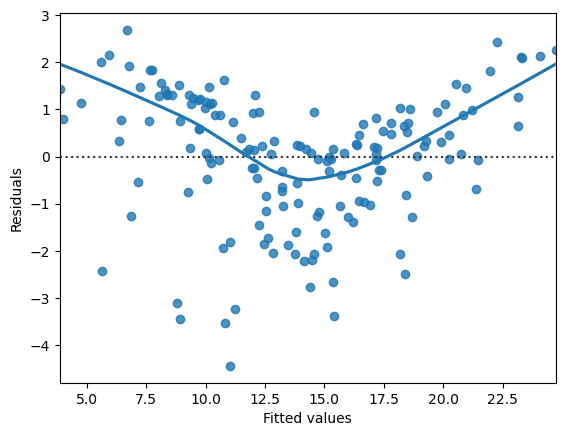

In [127]:
# checked using Residual v/s Fitted plot
model_fitted_y = lm_model.fittedvalues
sns.residplot(x=model_fitted_y, y='sales', data=new_df, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

**The line fitted into this errors should be a random line and should not show a typical wave like pattern.**

In [129]:
# if a wave like pattern is observed then reconsider the data we are working on, if anything needs to be shuffled any var needs to be eliminated.

## 15. Assumption 7: Errors should follow an approximate normal distribution

### Normal QQ plot

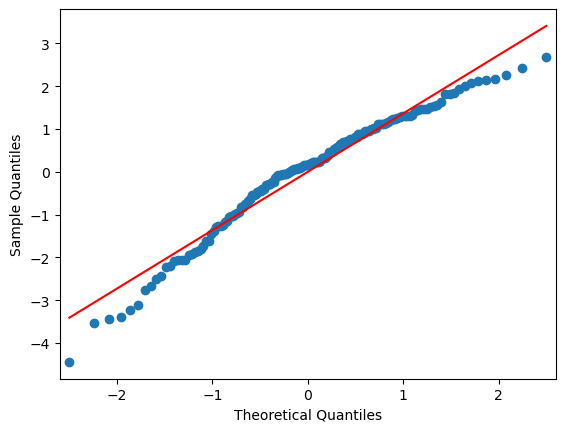

In [132]:
#checked using Normal QQ plot
import statsmodels.api as sma
sma.qqplot(lm_model.resid, line='s')
plt.show()

**The red diagonal line in the graph indicates normal distribution. If majority of the error points fall along the red diagonal line we can conclude that the errors do follow an approximate normal distribution.**

## 16. Assumption 8: Errors should follow constant variance (Homoskedasticity)

### Scale Location plot

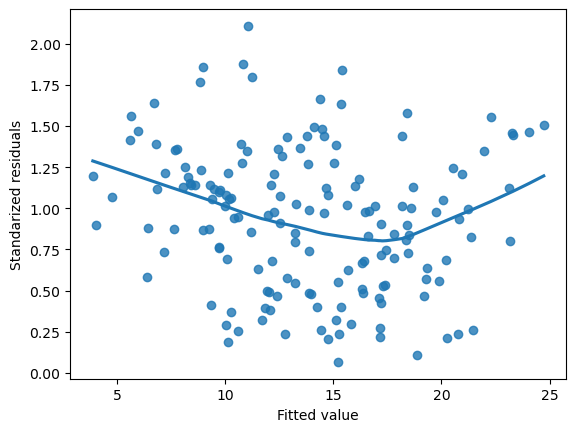

In [136]:
#checked using Scale location plot
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(lm_model.resid))
 
sns.regplot(x=lm_model.fittedvalues,
            y=model_norm_residuals_abs_sqrt,
              scatter=True, lowess=True)        
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.show()

**We can observe an approximate horizontal line hence we can conclude that the errors follows a constant variance**